In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.preprocess import preprocess

In [2]:
import os

# Create folder (only once)
save_dir = "plots"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
df_dirty = pd.read_csv('../data/train.csv')
df = preprocess(df_dirty)
df.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET,FLOOR_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATA,RESALE_PRICE,RESALE_YEAR,RESALE_MONTH,FLAT_AGE,FLOOR_AVG
0,2020-10,woodlands,4 room,681B,woodlands drive 62,07 to 09,102.0,premium apartment,2000,420000.0,2020,10,20,8
1,2021-07,bishan,4 room,264,bishan street 24,07 to 09,104.0,model a,1992,585000.0,2021,7,29,8
2,2021-05,bukit panjang,4 room,520,jelapang road,19 to 21,102.0,model a,1998,450000.0,2021,5,23,20
3,2021-08,punggol,4 room,121B,edgedale plains,16 to 18,93.0,model a,2017,465000.0,2021,8,4,17
4,2023-05,hougang,5 room,997B,buangkok crescent,10 to 12,113.0,improved,2018,710000.0,2023,5,5,11


In [4]:
df.shape

(162691, 14)

In [5]:
df['TOWN'].value_counts()
df['TOWN'].value_counts().shape

(26,)

# Target Variable

In [6]:
sns.set_theme(style="whitegrid", palette="pastel")

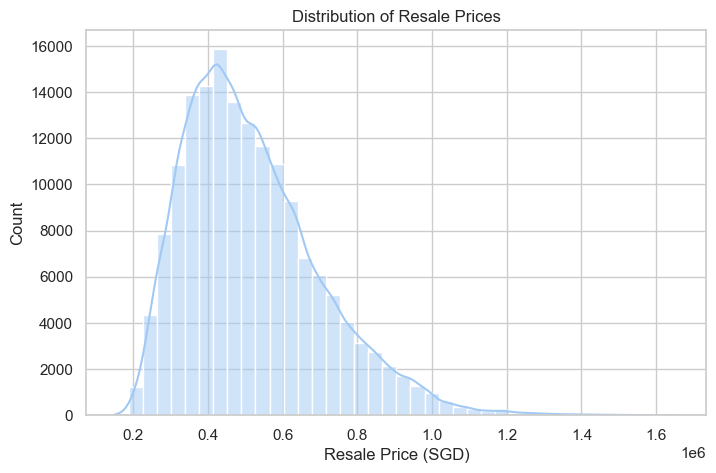

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['RESALE_PRICE'], kde=True, bins=40)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Count')
plt.savefig('plots/resale_price_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

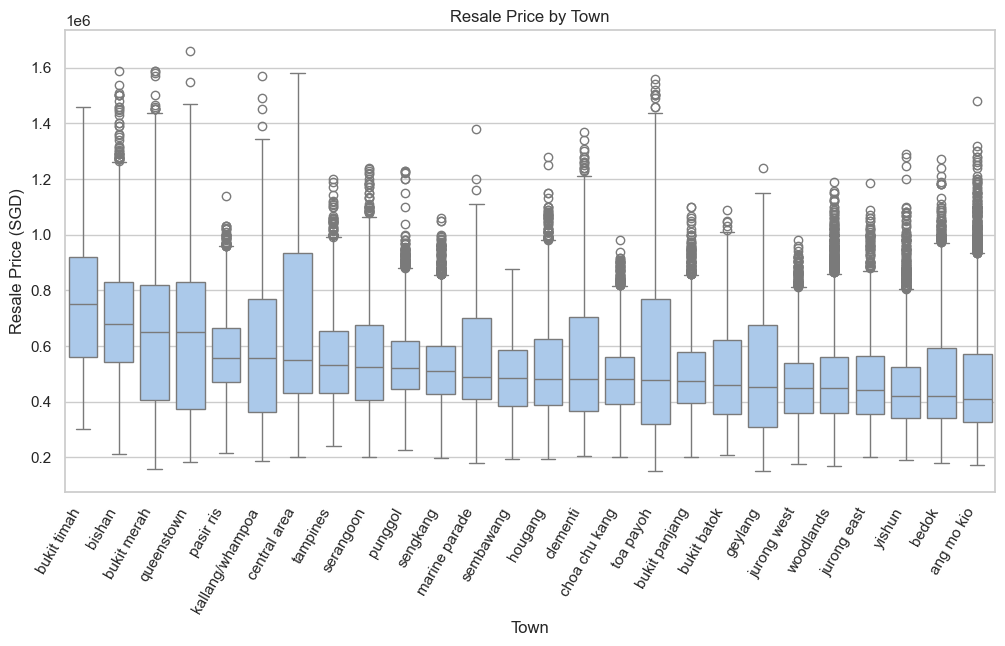

In [8]:
plt.figure(figsize=(12,6))
# Sort towns by median price
order = df.groupby('TOWN')['RESALE_PRICE'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='TOWN', y='RESALE_PRICE', order=order)
plt.xticks(rotation=60, ha='right')
plt.title('Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_town_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

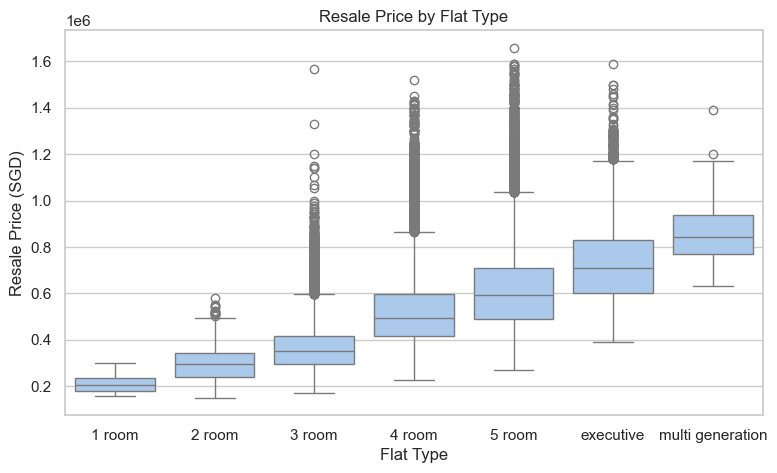

In [9]:
plt.figure(figsize=(9,5))
order = sorted(df['FLAT_TYPE'].unique())
sns.boxplot(data=df, x='FLAT_TYPE', y='RESALE_PRICE', order=order)
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_type_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()


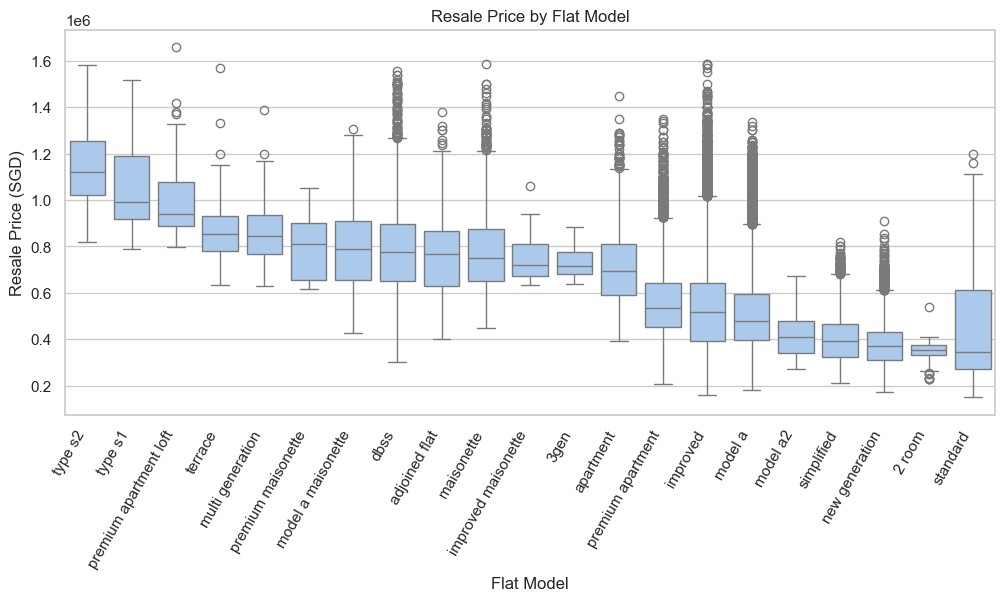

In [10]:
plt.figure(figsize=(12,5))
order = df.groupby('FLAT_MODEL')['RESALE_PRICE'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='FLAT_MODEL', y='RESALE_PRICE', order=order)
plt.title('Resale Price by Flat Model')
plt.xticks(rotation=60, ha='right')
plt.xlabel('Flat Model')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_model_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()


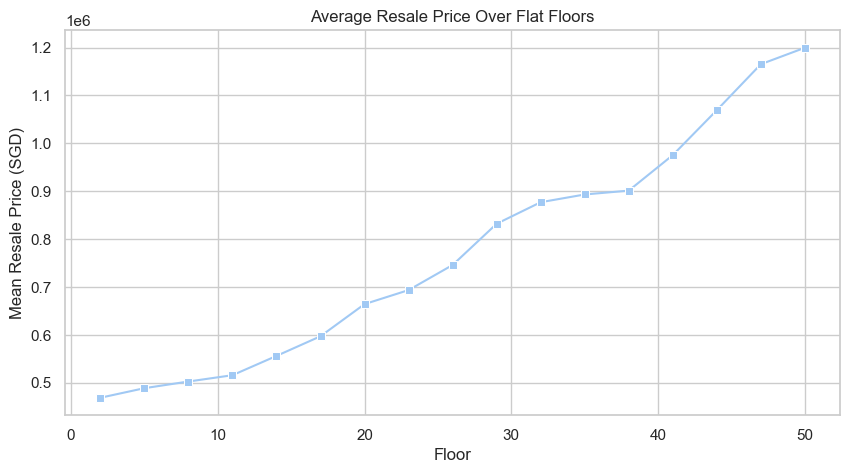

In [11]:
price_trend_mean = df.groupby('FLOOR_AVG')['RESALE_PRICE'].mean().reset_index()
# price_trend_median = df.groupby('FLOOR_AVG')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(data=price_trend_mean, x='FLOOR_AVG', y='RESALE_PRICE', marker='s')

# Median line
# sns.lineplot(
#     data=price_trend_median,
#     x='FLOOR_AVG', y='RESALE_PRICE',
#     label='Median Price', marker='s'
# )
plt.title('Average Resale Price Over Flat Floors')
plt.xlabel('Floor')
plt.ylabel('Mean Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_floors_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()


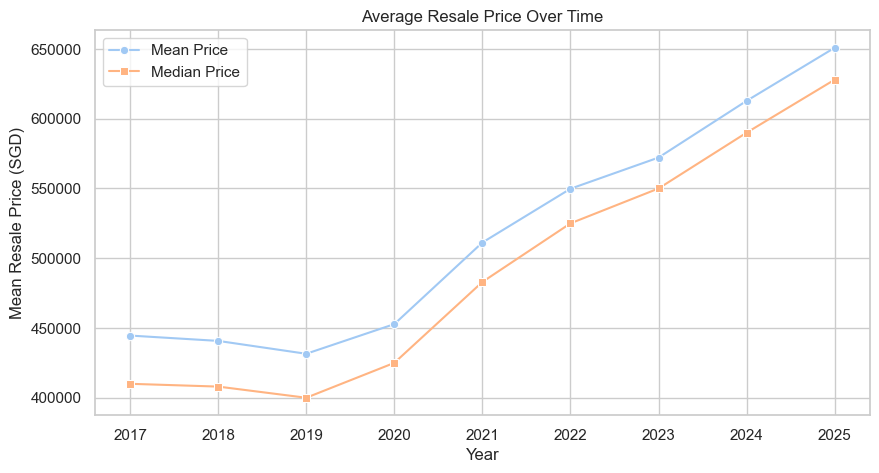

In [12]:
price_trend_mean = df.groupby('RESALE_YEAR')['RESALE_PRICE'].mean().reset_index()
price_trend_median = df.groupby('RESALE_YEAR')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(
    data=price_trend_mean,
    x='RESALE_YEAR', y='RESALE_PRICE',
    label='Mean Price', marker='o'
)

# Median line
sns.lineplot(
    data=price_trend_median,
    x='RESALE_YEAR', y='RESALE_PRICE',
    label='Median Price', marker='s'
)
plt.title('Average Resale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Resale Price (SGD)')
plt.savefig('plots/resale_price_by_resale_year_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()


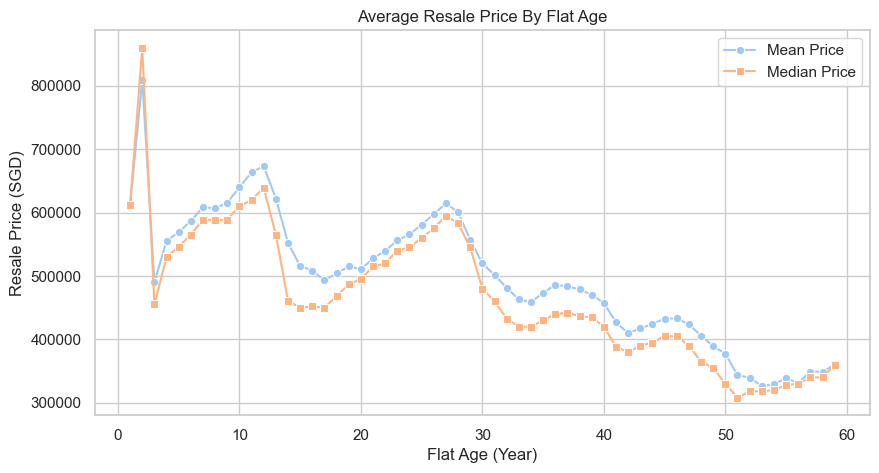

In [13]:
price_trend_mean = df.groupby('FLAT_AGE')['RESALE_PRICE'].mean().reset_index()
price_trend_median = df.groupby('FLAT_AGE')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(
    data=price_trend_mean,
    x='FLAT_AGE', y='RESALE_PRICE',
    label='Mean Price', marker='o'
)

# Median line
sns.lineplot(
    data=price_trend_median,
    x='FLAT_AGE', y='RESALE_PRICE',
    label='Median Price', marker='s'
)
plt.title('Average Resale Price By Flat Age')
plt.xlabel('Flat Age (Year)')
plt.ylabel('Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_age_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()

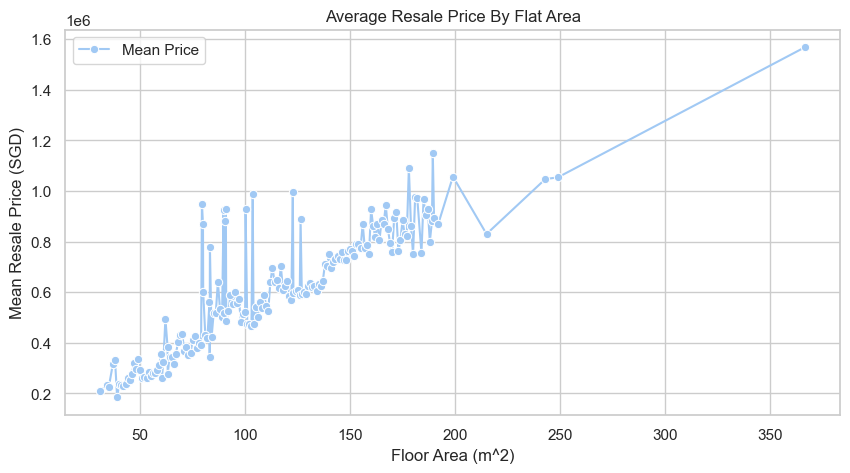

In [14]:
price_trend_mean = df.groupby('FLOOR_AREA_SQM')['RESALE_PRICE'].mean().reset_index()
price_trend_median = df.groupby('FLOOR_AREA_SQM')['RESALE_PRICE'].median().reset_index()

plt.figure(figsize=(10,5))
# Mean line
sns.lineplot(
    data=price_trend_mean,
    x='FLOOR_AREA_SQM', y='RESALE_PRICE',
    label='Mean Price', marker='o'
)

# Median line
# sns.lineplot(
#     data=price_trend_median,
#     x='FLOOR_AREA_SQM', y='RESALE_PRICE',
#     label='Median Price', marker='s'
# )
plt.title('Average Resale Price By Flat Area')
plt.xlabel('Floor Area (m^2)')
plt.ylabel('Mean Resale Price (SGD)')
plt.savefig('plots/resale_price_by_flat_area_lineplot.png', bbox_inches='tight', dpi=300)
plt.show()


# Between Features

In [15]:
sns.set_theme(style="whitegrid", palette="muted")

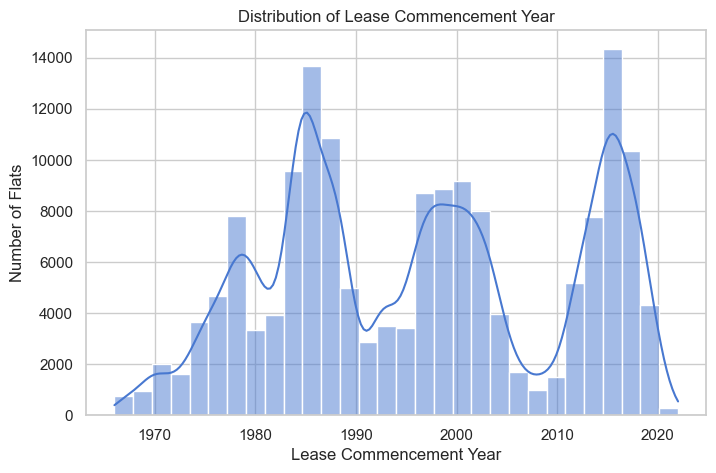

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['LEASE_COMMENCE_DATA'], bins=30, kde=True)
plt.title('Distribution of Lease Commencement Year')
plt.xlabel('Lease Commencement Year')
plt.ylabel('Number of Flats')
plt.savefig('plots/flat_count_distribution_over_lease_commencement_year.png', bbox_inches='tight', dpi=300)
plt.show()

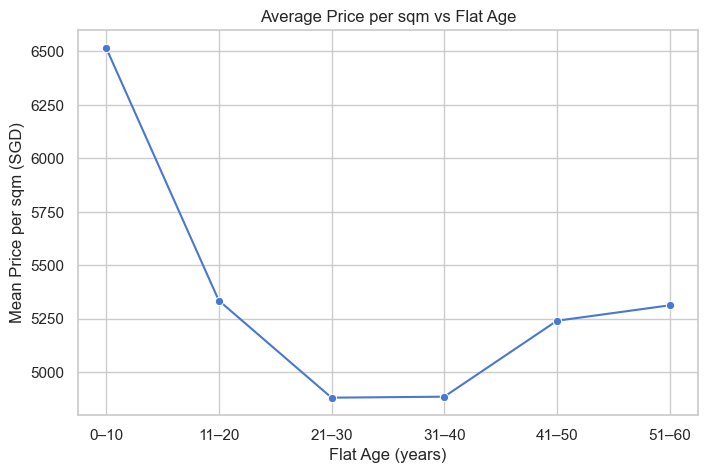

In [17]:
df['PRICE_PER_SQM'] = df['RESALE_PRICE'] / df['FLOOR_AREA_SQM']
df['AGE_BIN'] = pd.cut(df['FLAT_AGE'], bins=[0,10,20,30,40,50,60,70], labels=['0–10','11–20','21–30','31–40','41–50','51–60','61–70'])

price_age = df.groupby('AGE_BIN')['PRICE_PER_SQM'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=price_age, x='AGE_BIN', y='PRICE_PER_SQM', marker='o')
plt.title('Average Price per sqm vs Flat Age')
plt.xlabel('Flat Age (years)')
plt.ylabel('Mean Price per sqm (SGD)')
plt.savefig('plots/resale_price_per_sqm_vs_flat_age.png', bbox_inches='tight', dpi=300)
plt.show()

# Correlation

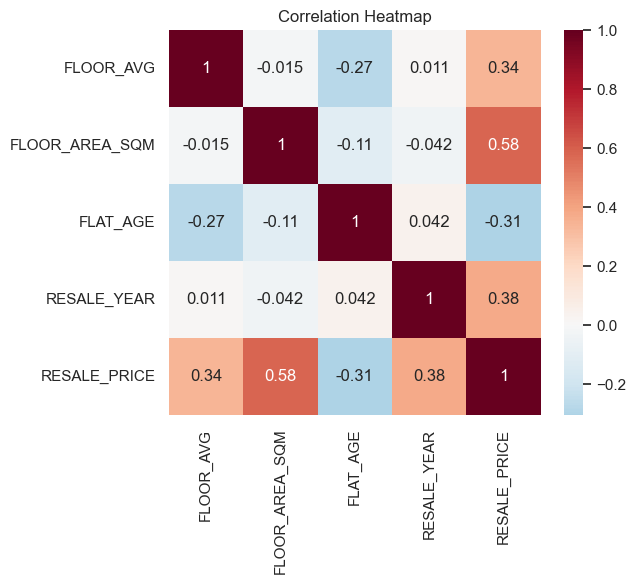

In [18]:
numeric_cols = ['FLOOR_AVG', 'FLOOR_AREA_SQM', 'FLAT_AGE', 'RESALE_YEAR', 'RESALE_PRICE']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.savefig('plots/correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()